# <center> Bài tập Thực hành môn Nhập môn Máy học </center>

### **Họ và tên:** Huỳnh Nguyễn Thế Dân
### **MSSV:** 21110256
### **Lớp:** 21TTH1

1. Analyze and Preprocess data - Check if the dataset has missing values or has any other problem.
2. Feature Engineering
3. Divide the dataset into 2 training and test sets
4. Use Pipeline
- 4. a. Use scaler and dimensional reduction (if it is necessary).
- 4. b. Use suitable Naive Bayes for this problem. 
5. Perform model on training set and test set using gridsearch CV
6. Measure performance of the model.
7. Which metric is your main metric for this problem and why? What are your scaler, dimensional reduction and naive bayes model as well as their params? (<= 200 words, also input your opinion or conclusion here)


How can I measure your point:
1. Your function is callable and runs correctly
2. The performance of your model (in full pipeline) is acceptable. The final error based on my train and test set is low enough.
3. The data preprocessing is correct or make sense
4. The Feature engineering is correct or make sense
5. Any other additional process will be considered a small plus point.

A Travel Company Is Offering Travel Insurance Packages To Their Customers. The new insurance plan also covers Covid-19. The Company Claims To Know Which Customers Are Interested To Buy It Based On The Company's Database History.

* Age - Age Of The Customer
* Employment Type - The Sector In Which Customer Is Employed
GraduateOrNot - Whether The Customer Is College Graduate Or Not
* AnnualIncome - The Yearly Income Of The Customer In Indian Rupees
* FamilyMembers - Number Of Members In Customer's Family
* ChronicDisease - Whether The Customer Suffers From Any Major Disease Or Conditions Like Diabetes/High BP or Asthama,etc.
* FrequentFlyer - Derived Data Based On Customer's History Of Booking Air Tickets On Atleast 4 Different Instances In The Last 2 Years (2017-2019).
* EverTravelledAbroad - Has The Customer Ever Travelled To A Foreign Country
* TravelInsurance - Did The Customer Buy Travel Insurance Package During Introductory Offering Held In The Year 2019.

## Load Dataset

In [245]:
#import library
import pandas as pd # pandas
import numpy as np # numpy
import time
import os
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing

In [246]:
# read data using Pandas DataFrame
def read_dataset(path):
    # Todo: read_csv from a path and return a DataFrame
    df = pd.read_csv(path)
    display(df.head())
    display(df.describe())
    display(df.info())
    return df

In [247]:
PATH = 'TravelInsurancePrediction.csv'

df = read_dataset(PATH)

,Unnamed: 0,Age,Employment Type,GraduateOrNot,AnnualIncome,FamilyMembers,ChronicDiseases,FrequentFlyer,EverTravelledAbroad,TravelInsurance
0,0,31,Government Sector,Yes,400000,6,1,No,No,0
1,1,31,Private Sector/Self Employed,Yes,1250000,7,0,No,No,0
2,2,34,Private Sector/Self Employed,Yes,500000,4,1,No,No,1
3,3,28,Private Sector/Self Employed,Yes,700000,3,1,No,No,0
4,4,28,Private Sector/Self Employed,Yes,700000,8,1,Yes,No,0


,Unnamed: 0,Age,AnnualIncome,FamilyMembers,ChronicDiseases,TravelInsurance
count,1987.000000,1987.000000,1.987000e+03,1987.000000,1987.000000,1987.000000
mean,993.000000,29.650226,9.327630e+05,4.752894,0.277806,0.357323
std,573.741812,2.913308,3.768557e+05,1.609650,0.448030,0.479332
min,0.000000,25.000000,3.000000e+05,2.000000,0.000000,0.000000
25%,496.500000,28.000000,6.000000e+05,4.000000,0.000000,0.000000
50%,993.000000,29.000000,9.000000e+05,5.000000,0.000000,0.000000
75%,1489.500000,32.000000,1.250000e+06,6.000000,1.000000,1.000000
max,1986.000000,35.000000,1.800000e+06,9.000000,1.000000,1.000000


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1987 entries, 0 to 1986
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Unnamed: 0           1987 non-null   int64 
 1   Age                  1987 non-null   int64 
 2   Employment Type      1987 non-null   object
 3   GraduateOrNot        1987 non-null   object
 4   AnnualIncome         1987 non-null   int64 
 5   FamilyMembers        1987 non-null   int64 
 6   ChronicDiseases      1987 non-null   int64 
 7   FrequentFlyer        1987 non-null   object
 8   EverTravelledAbroad  1987 non-null   object
 9   TravelInsurance      1987 non-null   int64 
dtypes: int64(6), object(4)
memory usage: 155.4+ KB


None

## Data Analysis

In [248]:
df.drop('Unnamed: 0', inplace=True, axis= 1)

In [249]:
df.columns

Index(['Age', 'Employment Type', 'GraduateOrNot', 'AnnualIncome',
       'FamilyMembers', 'ChronicDiseases', 'FrequentFlyer',
       'EverTravelledAbroad', 'TravelInsurance'],
      dtype='object')

In [250]:
numerical_cols = []
categorical_cols = []

for col in df.columns:
    if df[col].nunique() > 5:
        numerical_cols.append(col)
    else:
        categorical_cols.append(col)

In [251]:
for column in categorical_cols:
    print(f"Column: {column}")
    print(df[column].unique())
    print("-----------------------------")

Column: Employment Type
['Government Sector' 'Private Sector/Self Employed']
-----------------------------
Column: GraduateOrNot
['Yes' 'No']
-----------------------------
Column: ChronicDiseases
[1 0]
-----------------------------
Column: FrequentFlyer
['No' 'Yes']
-----------------------------
Column: EverTravelledAbroad
['No' 'Yes']
-----------------------------
Column: TravelInsurance
[0 1]
-----------------------------


In [252]:
categorical_cols.remove('TravelInsurance')
df['ChronicDiseases'] = df['ChronicDiseases'].astype(str)

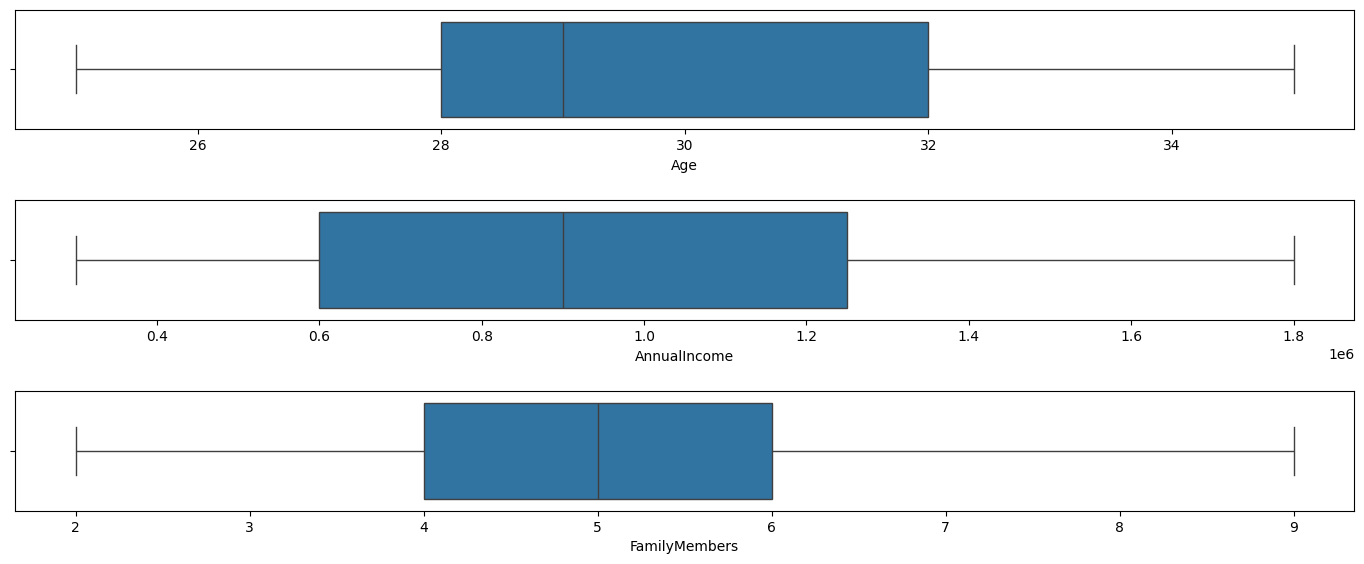

In [253]:
fig, axes = plt.subplots(len(numerical_cols), 1, figsize=(14, 2*len(numerical_cols)),sharex=False,sharey=False)

for i, column in enumerate(numerical_cols):
    sns.boxplot(x=column,data=df,ax=axes[i])
plt.tight_layout(pad=2.0)

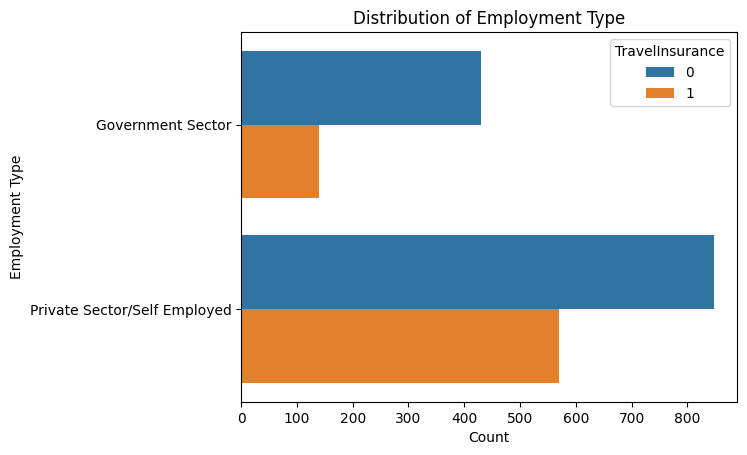

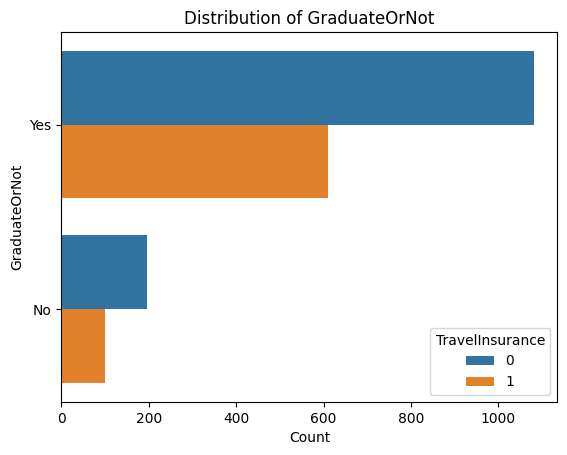

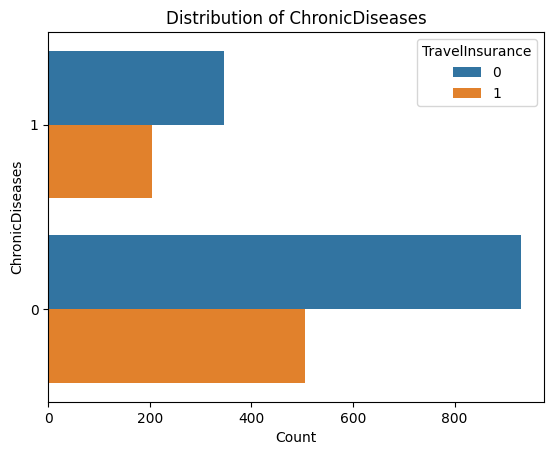

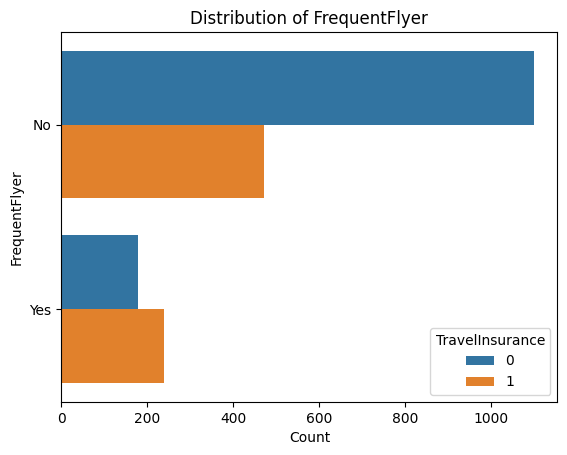

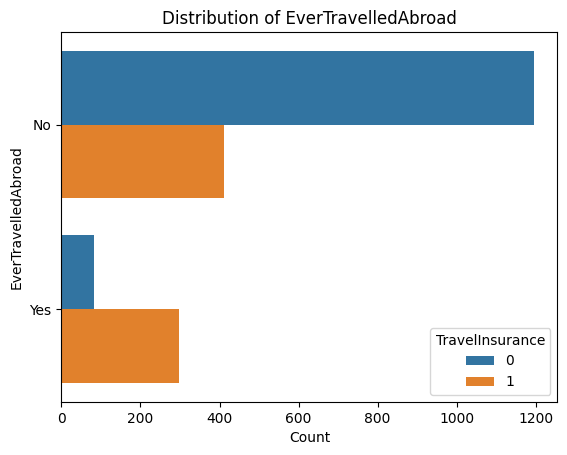

In [254]:
for col in categorical_cols:
    sns.countplot(y=col, data=df, hue='TravelInsurance')
    plt.title(f'Distribution of {col}')
    plt.ylabel(col)
    plt.xlabel('Count')
    plt.show()

<Axes: xlabel='TravelInsurance', ylabel='Count'>

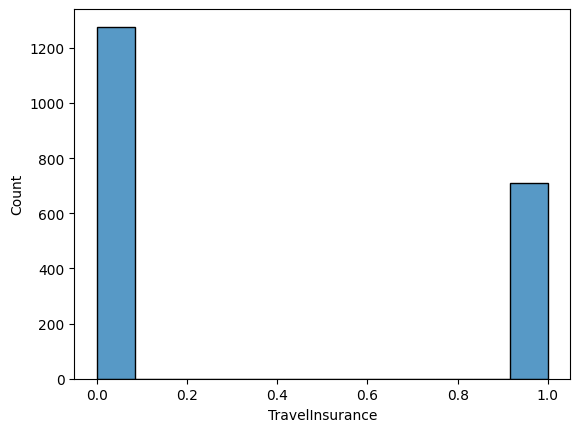

In [255]:
sns.histplot(x="TravelInsurance", data=df)

## Preprocessing

In [256]:
# Check Missing values
df[numerical_cols].isnull().sum()

Age              0
AnnualIncome     0
FamilyMembers    0
dtype: int64

In [257]:
# Check Missing values
df[categorical_cols].isnull().sum()

Employment Type        0
GraduateOrNot          0
ChronicDiseases        0
FrequentFlyer          0
EverTravelledAbroad    0
dtype: int64

In [258]:
# Check duplicates values
duplicate_rows = df.duplicated()
print("Duplicate Rows:")
display(df[duplicate_rows])

Duplicate Rows:


,Age,Employment Type,GraduateOrNot,AnnualIncome,FamilyMembers,ChronicDiseases,FrequentFlyer,EverTravelledAbroad,TravelInsurance
69,31,Government Sector,No,300000,4,0,No,No,0
103,26,Private Sector/Self Employed,Yes,1400000,5,0,No,Yes,1
117,31,Government Sector,Yes,400000,5,0,No,No,0
148,25,Private Sector/Self Employed,Yes,1400000,4,0,No,Yes,1
164,28,Government Sector,Yes,300000,6,0,No,No,0
...,...,...,...,...,...,...,...,...,...
1978,34,Private Sector/Self Employed,Yes,700000,5,0,No,No,1
1979,28,Private Sector/Self Employed,Yes,1100000,4,1,No,No,0
1980,25,Private Sector/Self Employed,No,1150000,5,1,No,No,0
1984,28,Private Sector/Self Employed,Yes,1150000,6,1,No,No,0


In [259]:
def preprocessing_data(df):
    df.fillna(df.mean, inplace= True)
    df = df.drop_duplicates()
    return df

In [260]:
preprocessing_data = preprocessing_data(df.copy())

display(preprocessing_data.head())

,Age,Employment Type,GraduateOrNot,AnnualIncome,FamilyMembers,ChronicDiseases,FrequentFlyer,EverTravelledAbroad,TravelInsurance
0,31,Government Sector,Yes,400000,6,1,No,No,0
1,31,Private Sector/Self Employed,Yes,1250000,7,0,No,No,0
2,34,Private Sector/Self Employed,Yes,500000,4,1,No,No,1
3,28,Private Sector/Self Employed,Yes,700000,3,1,No,No,0
4,28,Private Sector/Self Employed,Yes,700000,8,1,Yes,No,0


## Feature Engineering

In [261]:
def apply_feature_engineering(df):
    for col in categorical_cols:
        df[col] = df[col].astype("category").cat.codes
    return df

In [262]:
processed_df = apply_feature_engineering(preprocessing_data.copy())
processed_df

,Age,Employment Type,GraduateOrNot,AnnualIncome,FamilyMembers,ChronicDiseases,FrequentFlyer,EverTravelledAbroad,TravelInsurance
0,31,0,1,400000,6,1,0,0,0
1,31,1,1,1250000,7,0,0,0,0
2,34,1,1,500000,4,1,0,0,1
3,28,1,1,700000,3,1,0,0,0
4,28,1,1,700000,8,1,1,0,0
...,...,...,...,...,...,...,...,...,...
1976,32,0,1,900000,6,0,0,0,0
1981,27,0,1,850000,3,0,0,0,1
1982,33,1,1,1500000,4,0,1,1,1
1983,28,1,1,1750000,5,1,0,1,0


<Axes: >

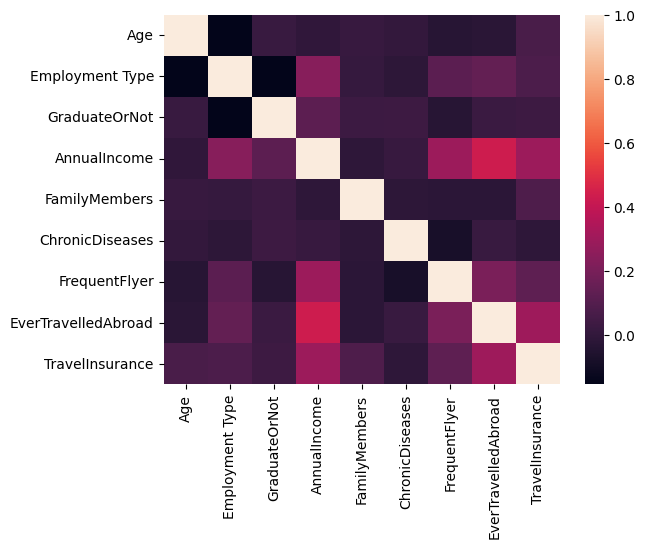

In [263]:
sns.heatmap(processed_df.corr())

# Apply machine learning model

In [264]:
def prepare_X_y(df):

    X = df.drop('TravelInsurance', axis=1, inplace=False).values

    y = df['TravelInsurance']
    y = np.array([0 if i==0 else 1 for i in y])
    y = y.reshape((-1, 1))
    return X, y

X, y = prepare_X_y(processed_df)

## Train-test split

In [265]:
from sklearn.model_selection import train_test_split
RANDOM_STATE = 2024
TRAIN_SIZE = 0.7

trainX, testX ,trainY, testY = train_test_split(X, y, train_size=TRAIN_SIZE, random_state=RANDOM_STATE)

## Build SK-learn model

In [266]:
from sklearn.model_selection import GridSearchCV
from sklearn.naive_bayes import BernoulliNB

model = BernoulliNB()

# Định nghĩa grid của các siêu tham số
param_grid = {
    'alpha': [0.1, 0.5, 1.0, 1.5, 2.0],  # Lưới 5 giá trị cho siêu tham số alpha
    'binarize': [0.0, 0.2, 0.4, 0.6, 0.8],  # Lưới 5 giá trị cho siêu tham số binarize
    'fit_prior': [True, False]  # Lưới 2 giá trị cho siêu tham số fit_prior
}

# Tạo một GridSearchCV
grid_search = GridSearchCV(model, param_grid, cv=10)

# Huấn luyện GridSearchCV trên dữ liệu
grid_search.fit(trainX, trainY.ravel())

# Truy cập các giá trị tốt nhất của các siêu tham số
best_params = grid_search.best_params_
print("Best parameters:", best_params)

Best parameters: {'alpha': 1.5, 'binarize': 0.0, 'fit_prior': True}


In [267]:
from sklearn.pipeline import make_pipeline
from sklearn.naive_bayes import BernoulliNB
from sklearn.preprocessing import MinMaxScaler

def build_model(X, y):
    # Tạo một pipeline bao gồm việc chuẩn hóa dữ liệu và mô hình Bernoulli Naive Bayes
    model = make_pipeline(MinMaxScaler(), BernoulliNB(alpha= 1.5, binarize= 0.0, fit_prior= True))
    # Huấn luyện mô hình trên dữ liệu đầu vào X và nhãn y
    model.fit(X, y.ravel())
    return model

model = build_model(trainX, trainY)

y_pred = model.predict(testX)

In [272]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
def calculate_performance(y_true, y_pred):

    precision = precision_score(y_true, y_pred)
    recall = recall_score(y_true, y_pred)
    accuracy = accuracy_score(y_true, y_pred)
    f1 = f1_score(y_true, y_pred)
    
    print("Precision:", precision)
    print("Recall:", recall)
    print("Accuracy:", accuracy)
    print("F1 Score:", f1)

    print('--------------------------------')
    main_score = f1
    print("The main score is F1 Score: ", main_score)

    
performance = calculate_performance(testY, y_pred)

Precision: 0.5769230769230769
Recall: 0.36
Accuracy: 0.6986666666666667
F1 Score: 0.4433497536945813
--------------------------------
The main score is F1 Score:  0.4433497536945813


In [269]:
report = classification_report(testY, y_pred)

print(report)

              precision    recall  f1-score   support

           0       0.73      0.87      0.79       250
           1       0.58      0.36      0.44       125

    accuracy                           0.70       375
   macro avg       0.65      0.61      0.62       375
weighted avg       0.68      0.70      0.68       375



In [274]:
conf_matrix = confusion_matrix(testY, y_pred)

print(conf_matrix)

[[217  33]
 [ 80  45]]


In [270]:
def get_conclusion():
    # Todo: Please return your answer, conclusion and opinion right here
    return  "7. \n" \
            "In the context of predicting travel insurance purchases, achieving a high F1 score ensures that the model \n" \
            "is making accurate positive predictions (high precision) while also capturing a significant portion of actual \n" \
            "insurance purchasers (high recall). This balance is crucial in order to make effective decisions based on the \n" \
            "model's predictions, such as targeted marketing strategies for potential insurance buyers. Therefore,\n" \
            "the F1 score is a suitable choice for evaluating the model's performance in this scenario."

In [271]:
print(get_conclusion())

7. 
In the context of predicting travel insurance purchases, achieving a high F1 score ensures that the model 
is making accurate positive predictions (high precision) while also capturing a significant portion of actual 
insurance purchasers (high recall). This balance is crucial in order to make effective decisions based on the 
model's predictions, such as targeted marketing strategies for potential insurance buyers. Therefore,
the F1 score is a suitable choice for evaluating the model's performance in this scenario.
